In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [31]:
fashionMnist = keras.datasets.fashion_mnist
(trainImages, trainLabels), (testImages, testLabels) = fashionMnist.load_data()

In [14]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0

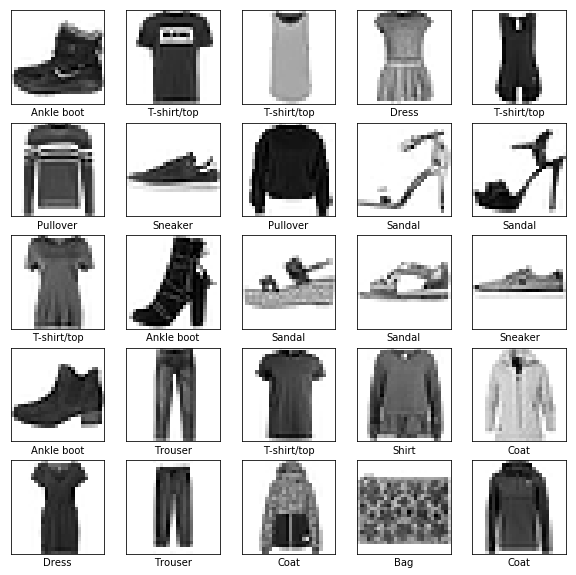

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainLabels[i]])
plt.show()

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 12.9705 - acc: 0.1953
Epoch 2/10
60000/60000 [==============================] - ETA: 0s - loss: 13.2115 - acc: 0.18 - 6s 99us/sample - loss: 13.2118 - acc: 0.1803
Epoch 3/10
60000/60000 [==============================] - 6s 100us/sample - loss: 12.9082 - acc: 0.1991
Epoch 4/10
60000/60000 [==============================] - 6s 102us/sample - loss: 12.9243 - acc: 0.1981
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 12.9259 - acc: 0.1981
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 12.9259 - acc: 0.1981
Epoch 7/10
27520/60000 [============>.................] - ETA: 3s - loss: 12.9390 - acc: 0.1972

In [40]:
test_loss, test_acc = model.evaluate(testImages, testLabels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 12.9009 - acc: 0.1996
Test accuracy: 0.1996


In [42]:
predictions = model.predict(testImages)

In [47]:
print(predictions[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [49]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    

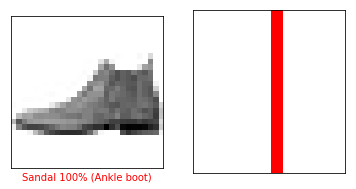

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  testLabels)
plt.show()

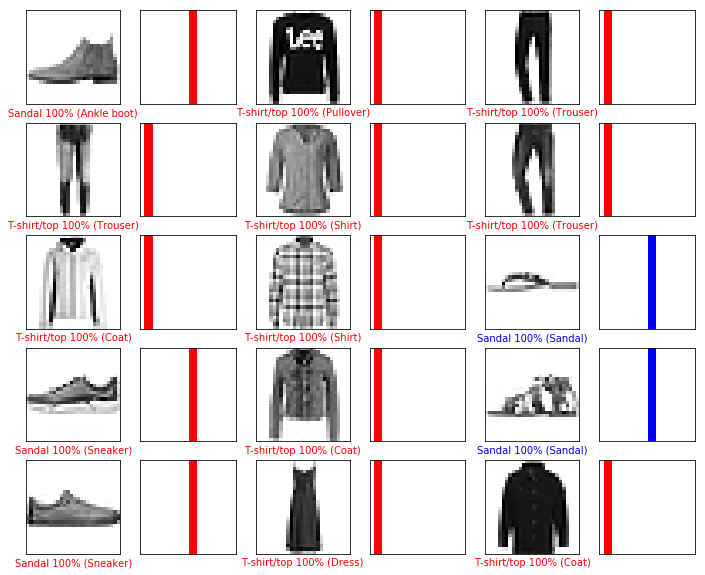

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, testLabels, testImages)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, testLabels)
plt.show()

